###### Lab 6 - EE350
# Filtres RII

À rendre le 14 decembre 2021

In [1]:
# Imports
from scipy import signal, special
import scipy
import numpy as np
np.seterr(divide = 'ignore')
np.seterr(invalid='ignore')
from scipy.io import wavfile
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt
import math

## Exercice 1: Filtre RII passe-bas

On peut voir sur la figure 1 le gabarit d'un filtre numérique passe-bas. On aimerait construire un tel filtre par conversion d'un filtre analogique grâce à la transformée bilinéaire.

![picture](characteristics.png)

On aimerait que ce filtre respecte les spécifications suivantes:
* Oscillation en bande passante (ou oscillation crête-à-crête, reliée au paramètre $\delta_1$): $\leq -1$ dB. Le gabarit est donc donné par $1 - \delta_1 = -1 $ dB.
* Fréquence maximale de la bande passante: $\omega_p = 0.4 \pi$.
* Niveau maximum en bande coupée (relié au paramètre $\delta_2$) : $ \leq -22$ dB.
* Fréquence minimale de la bande coupée: $\omega_s = 0.7 \pi$.
* Fréquence d'échantillonnage: $F_e = 3$ kHz.

**Conseils:**

* Pour déterminer l'ordre d'un filtre analogique, on a besoin des paramètres suivants $\delta, \epsilon, \Omega_p$ et $\Omega_s$. Puisque la conversion analogique-numérique se fait avec la transformation bilinéaire, vous devrez utiliser la transformation non-linéaire des fréquences pour transformer les spécifications données pour le filtre numérique $\omega_p$ et $\omega_s$ en fréquences analogiques $\Omega_p$ et $\Omega_s$.
* Pour rappel, les relations reliant $\delta$ et $\epsilon$ à $\delta_1$, $\delta_2$ sont:
$$
\begin{align}
\delta_2 = \frac{1}{\sqrt{1 + \delta^2}} \\
\frac{1}{\sqrt{1 + \epsilon^2}} = 1 - \delta_1.
\end{align}
$$
* Pour rappel, l'expression en décibels d'une valeur $\delta$ normalisée peut être trouvée comme suit:
$$
    \delta_{dB} = 20 \log_{10}(\delta).
$$

* Attention: pour ne pas faire d'erreur dans le signe des différentes grandeurs, il est utile de se représenter l'axe des ordonnées en décibels : 1 devient 0, $1- \delta_1$ devient une valeur négative (-1db), et $\delta_2$ est une valeur négative bien plus basse (-22db). Notez que $1-\delta_1$ et $\delta_2$ sont nécessairement plus petits que 1 et que leur valeur en db sera donc toujours négative. Cependant, certaines fonctions prennent en argument la valeur absolue des décibels (positive, donc). Lisez bien la documentation de chaque fonction.


**1. Calculer les paramètres $\delta, \epsilon, \Omega_p$ et $\Omega_s$ nécessaires pour le design des filtres analogiques.**

**Réponse :**
$$
\Omega = \frac{2}{T} \tan\left(\frac{\omega}{2}\right) \\
\Omega_p = \frac{2}{T_e} \tan\left(\frac{\omega_p}{2}\right)= 4.3593e3 \\
\Omega_s = \frac{2}{T_e} \tan\left(\frac{\omega_s}{2}\right)= 1.1775e4 \\
$$

From the given, since $\delta_2 \leq -22$dB $\implies 20\log(\delta_2) \leq -22 \implies \delta_2 \leq 10^{\frac{-22}{20}} = 0.07943$, and since $1-\delta_1 = -1$dB $\implies 20\log(\delta_1) = -1 \implies 1-\delta_1 = 0.89125$, we have the following:

$$
\delta_2 = \frac{1}{sqrt{1+\delta^2}} \implies \delta = \sqrt{\left(\frac{1}{\delta_2}\right)^2 -1} = 12.5495 \\
1-\delta_1 = \frac{1}{sqrt{1+\epsilon}} \implies \epsilon = \left(\frac{1}{1-\delta_1}\right)^2 - 1 = 0.2589
$$

**2. Déterminez analytiquement l'ordre du filtre numérique Butterworth qui respecte le gabarit donné. Vérifiez le résultat avec la fonction `scipy.signal.buttord`.**


**Réponse :** 

L'ordre du filtre numérique Butterworth est donné par l'equation suivante:
$$
N = \frac{\log(\delta/\epsilon)}{\log(\Omega_s/\Omega_p)} = 3.904 \implies N=4
$$

In [2]:
wp = 0.4 
ws = 0.7 

d1 = abs(-1)
d2 = abs(-22)

#factor of pi included for wp, ws specs
[N,w]= signal.buttord(wp, ws, d1, d2)
print("Order of Butterworth filter:", N)

Order of Butterworth filter: 4


**3. Si on utilise un filtre de Chebyshev, quel type de filtre (type I ou type II) est le plus adapté à ces spécifications ? Justifiez.**

**Réponse :**

Un filtre de Chebyshev de type II est plus adapté à ces spécifications, parce qu'il a plus d'oscillations dans la bande coupée, et moins dans la band passante.

**4. Déterminez analytiquement l'ordre du filtre numérique Chebyshev (du type déterminé à la question précédente) qui respecte le gabarit donné. Vérifiez les résultats avec les fonctions `scipy.signal.cheb1ord` ou `scipy.signal.cheb2ord`.**

**Réponse :**

L'ordre d'un filtre numérique Chebyshev (Type II) est donné par l'équation suivante:
$$
N=\frac{cosh^{-1}(\delta/\epsilon)}{cosh^{-1}(\Omega_s/\Omega_p)} = 2.7709 \implies N=3 
$$

In [3]:
wp = 0.4 
ws = 0.7 

d1 = abs(-1)  #dB
d2 = abs(-22) #dB

#factor of pi included for wp, ws specs
[N,w]= signal.cheb2ord(wp, ws, d1, d2)

print("Order of Chebyshev Type II filter:", N)

Order of Chebyshev Type II filter: 3


**5. Déterminez analytiquement l'ordre du filtre numérique elliptique qui respecte le gabarit donné. (Vous pouvez calculer les intégrales elliptiques en utilisant la fonction `scipy.special.ellipk`). Vérifiez le résultat avec la commande `scipy.signal.ellipord`.**



**Réponse :** 

L'ordre d'un filtre elliptique est donné par l'equation suivante:
$$
N = \frac{K(\Omega_p/\Omega_s)K\left(\sqrt{1-(\epsilon^2/\delta^2)}\right)}{K(\epsilon/\delta)K\left(\sqrt{1-(\Omega_p/\Omega_s)^2}\right)} 
$$

$$K(x)=\int^{\pi/2}_{0}\frac{d\theta}{\sqrt{1-x^2sin^2\theta}}$$ 
L'integral elliptique $K(x)$ est evaluée en Python:

In [4]:
# Calculation des intégrales elliptiques

a_sq= -9.624169
b_sq= 0.862957
c_sq= 0.370193 ** 2
d_sq= 0.020630 ** 2


K_a= special.ellipk(a_sq)
K_b= special.ellipk(b_sq)
K_c= special.ellipk(c_sq)
K_d= special.ellipk(d_sq)

print("K(a) = {}\nK(b) = {}\nK(c) = {}\nK(d) = {}\n".format(K_a, K_b, K_c, K_d))
print("N={} (par calcul analytique)".format(np.ceil((K_c*K_a)/(K_d*K_a))))


# Vérification du résultat

wp = 0.4 
ws = 0.7 

d1 = abs(-1)
d2 = abs(-22)

#factor of pi included for wp, ws specs
[N, w]= signal.ellipord(wp, ws, d1, d2)
print("N={} (avec la commande ellipord())".format(np.ceil((K_c*K_a)/(K_d*K_a))))

K(a) = 0.7997046955413208
K(b) = 2.4308309544112774
K(c) = 1.629202905275326
K(d) = 1.5709634983295222

N=2.0 (par calcul analytique)
N=2.0 (avec la commande ellipord())


**6. Tracez la réponse en amplitude et en phase pour chacun des filtres ci-dessus, ainsi que le gabarit imposé (vous pouvez utiliser les fonctions `scipy.signal.butter`, `scipy.signal.cheby1` or `scipy.signal.cheby2`, `scipy.signal.ellip` pour créer les filtres et `scipy.signal.freqz` pour observer le comportement fréquentiel). Discutez les résultats et comparez la performance des filtres.**

**Attention :** dans le cours, nous avons vu que pour construire des filtres numériques RII, on transforme les spécifications dans le domaine analogique afin de choisir le bon filtre analogique. Ensuite, on convertit ce filtre en filtre numérique par la transformation bilinéaire. 
Cependant, les fonctions `butter, cheby` et `ellip` font cette conversion automatiquement: on peut donner directement en argument les spécifications du filtre numérique, sans avoir à faire les conversions.


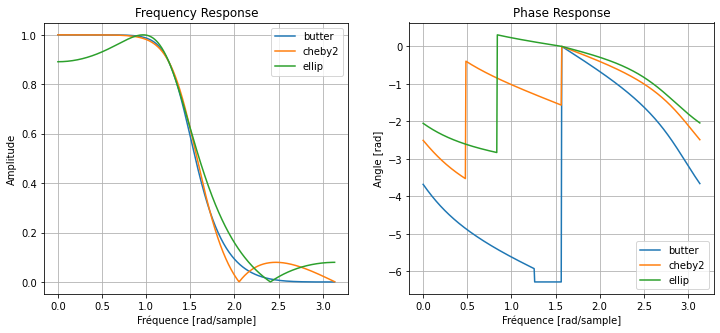

In [5]:
def dB(x):
    return 20 * np.log10(abs(x))

def norm(v):
    v = v / np.linalg.norm(v)

def get_fft(x, f_e):
    x_fft = np.fft.fft(x)
    x_fft_freq = np.fft.fftfreq(len(x), 1/f_e)
    
    x_fft = np.fft.fftshift(x_fft)
    x_fft_freq = np.fft.fftshift(x_fft_freq)
    return (x_fft, x_fft_freq)

#Get filter characteristics
wp= 0.4 #pi
ws= 0.7 #pi

d1= abs(-1)  #dB passband ripple
d2= abs(-22) #dB stopband ripple
    
F_e= 3000
      
fig, axs= plt.subplots(1,2, figsize=(12,5))
fig.subplots_adjust(hspace = 0.5)

ax= axs[0]
[N, wn]= signal.buttord(wp, ws, d1, d2)
[b_butter, a_butter] = signal.butter(N, wn)
w, h_butter = signal.freqz(b_butter, a_butter)
norm(h_butter)
for i in range(len(h_butter)):
    if (dB(h_butter[i])  < -70):
        h_butter[i]=0;
ax.plot(w, abs(h_butter), label='butter')

[N, wn]= signal.cheb2ord(wp, ws, d1, d2)
[b_cheby, a_cheby] = signal.cheby2(N, d2, wn)
w, h_cheby = signal.freqz(b_cheby, a_cheby)
norm(h_cheby)
ax.plot(w, abs(h_cheby), label='cheby2')

[N, wn]= signal.ellipord(wp, ws, d1, d2)
[b_ellip, a_ellip] = signal.ellip(N, d1, d2, wn)
w, h_ellip = signal.freqz(b_ellip, a_ellip)
norm(h_ellip)
ax.plot(w, abs(h_ellip), label='ellip')

ax.set_ylabel('Amplitude')
ax.set_xlabel('Fréquence [rad/sample]')
ax.set_title('Frequency Response')
ax.legend()
ax.grid()

ax= axs[1]
butter_angle = np.unwrap(np.angle(h_butter))
cheby_angle = np.unwrap(np.angle(h_cheby))
ellip_angle = np.unwrap(np.angle(h_ellip))

butter_angle = np.fft.fftshift(butter_angle)
cheby_angle = np.fft.fftshift(cheby_angle)
ellip_angle = np.fft.fftshift(ellip_angle)

ax.plot(w, butter_angle, label='butter')
ax.plot(w, cheby_angle, label='cheby2')
ax.plot(w, ellip_angle, label='ellip')


ax.set_ylabel('Angle [rad]')
ax.set_xlabel('Fréquence [rad/sample]')
ax.set_title('Phase Response')
ax.legend()
ax.grid()

plt.show()

**Réponse :** 

The butterworth and chebyshev (type 2) filters perform better in the passband, as the elliptical filter attenuates passband frequencies more than the other two filters. The Chebyshev and the butterworth filters have relatively transition bands of approximately the same length. Furhtermoer, the Butterworth filter has the least stopband ripple, while the other two filters experience a minimum attenuation of -22dB in the stopband. Looking solely at the filter's amplitude, the Butterworth filter performs the best.

Observing the phase response of each filter, we notice that the Butterworth filter experiences the maximum phase shift compared to the other two filters. The Butterworth filter's phase response decreases at a higher rate than the other two filters after the center of the transition band at approximately 1.5 rad/sample. Overall, from a phase-response perspective, the elliptical filter experiences the least phase shift, make it the optimal filter.

**7. Tracez le diagramme pôles-zéros pour chacun des filtres ci-dessus. Discutez du placement des pôles et des zéros, les diagrammes sont-ils cohérents avec le fait que les filtres sont passe-bas? (Vous pouvez utiliser la fonction `scipy.signal.tf2zpk` pour tracer le diagramme).**

Chebyshev II (N=3) [pôles], [zéros]:
 [ 0.05950439-0.64096077j -0.05031406+0.j          0.05950439+0.64096077j]
[-0.4639337-0.88586992j -0.4639337+0.88586992j -1.       +0.j        ] 

Butterworth (N=4) (pôles], [zéros]:
 [0.10840862+0.66273604j 0.07809171+0.19774524j 0.07809171-0.19774524j
 0.10840862-0.66273604j]
[-1. -1. -1. -1.] 

Elliptique (N=2) [pôles], [zéros]:
 [0.16775344-0.57391277j 0.16775344+0.57391277j]
[-0.74270479+0.66961899j -0.74270479-0.66961899j] 



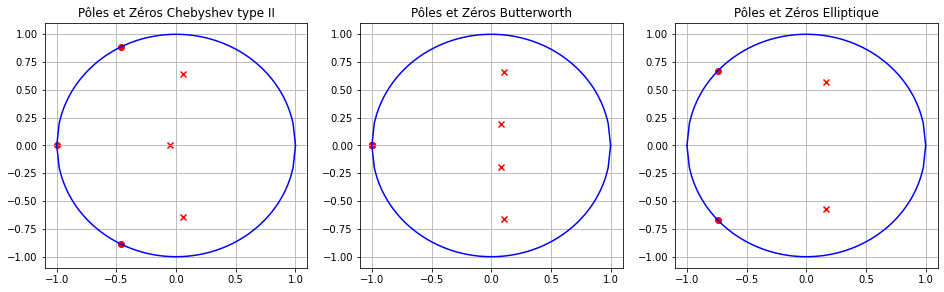

Les 'x' indiquent les pôles et les 'o' indiquent les zéros


In [6]:
def graphCircle(ax):
    x= np.linspace(-1,1,100)
    y= np.sqrt(1 - (x ** 2))
    
    ax.plot(x,y, color='b')
    ax.plot(x,-y, color='b')
    
wp= 0.4 #pi
ws= 0.7 #pi

d1= abs(-1)  #dB
d2= abs(-22) #dB
    
[N, wn]= signal.buttord(wp, ws, d1, d2)
[z_butter, p_butter, k] = signal.butter(N, wn, output='zpk')

[N, wn]= signal.cheb2ord(wp, ws, d1, d2)
[z_cheby, p_cheby, k] = signal.cheby2(N, d2, wn, output='zpk')

[N, wn]= signal.ellipord(wp, ws, d1, d2)
[z_ellip, p_ellip, k] = signal.ellip(N, d1, d2, wn, output='zpk')

fig, axs= plt.subplots(1,3, figsize=(16,4.5))
fig.subplots_adjust(hspace = 1.4)

print("Chebyshev II (N=3) [pôles], [zéros]:\n",p_cheby)
print(z_cheby,"\n")
axs[0].scatter(z_cheby.real, z_cheby.imag, color='r', marker='o', label='zéros')
axs[0].scatter(p_cheby.real, p_cheby.imag, color='r', marker='x', label='pôles')
graphCircle(axs[0])

print("Butterworth (N=4) (pôles], [zéros]:\n",p_butter)
print(z_butter,"\n")
axs[1].scatter(z_butter.real, z_butter.imag, color='r', marker='o', label='zéros')
axs[1].scatter(p_butter.real, p_butter.imag, color='r', marker='x', label='pôles')
graphCircle(axs[1])

print("Elliptique (N=2) [pôles], [zéros]:\n",p_ellip)
print(z_ellip,"\n")
axs[2].scatter(z_ellip.real, z_ellip.imag, color='r', marker='o', label='zéros')
axs[2].scatter(p_ellip.real, p_ellip.imag, color='r', marker='x', label='pôles')
graphCircle(axs[2])

axs[0].set_title('Pôles et Zéros Chebyshev type II')
axs[1].set_title('Pôles et Zéros Butterworth')
axs[2].set_title('Pôles et Zéros Elliptique')

axs[0].grid()
axs[1].grid()
axs[2].grid()
plt.show()
print("Les \'x\' indiquent les pôles et les \'o\' indiquent les zéros")

**Réponse :** 
Les diagrames de pôles et zéros indiquent tous que les filtres sont en effet des filtres passe-bas. Lorsque les zéros diminue l'influence de la fréquence à laquelle ils se trouvent, et les pôles augmente l'influence de la fréquence à laquelle ils se trouvent, on observe que les fréquences qui sont accentuées sont des fréquences basses, et les fréquence qui sont diminuées sont des fréquences hautes (près de $\pi$ radians). En effect, les diagrames de pôles-zéros sont cohérent avec le fait que ces filtres sont passe-bas.

# Exercice 2 : Conversion de filtres

## Exercise 2.1: Filtres passe-bas
Les filtres RII sont généralement basés sur des équivalents analogiques (Butterworth, Chebyshev, etc.), qui sont convertis en utilisant la transformation bilinéaire qui transfère les pôles et les zéros du filtre analogique dans le domaine numérique (plans des $z$). 

La transformation bilinéaire est une transformation du domaine des $s$ au domaine des $z$ qui préserve les caractéristiques de fréquence et est définie par:

\begin{equation}
    s=\frac{2}{T} \frac{1-z^{-1}}{1+z^{-1}}
\end{equation}

Considérez le filtre passe-bas suivant :
\begin{equation} H_a(s)=\frac{\Omega_p}{s+\Omega_p}
\end{equation}
    
avec la fréquence de coupure *$\Omega_p=1$ rad/s*. Concevez un filtre passe-bas RII $H_1(z)$ de fréquence de coupure $\omega_p=\pi/20$ rad/échantillon à partir de $H_a(s)$ en utilisant la méthode de la transformation bilinéaire.

**Méthode :**
  - Écrivez $H_1(z)$  sous une forme analytique en fonction de $T$ et déterminez la valeur de $T$ telle que la fréquence de coupure du filtre $H_1(z)$ soit $\omega_p$.
  - Tracez l'amplitude de la réponse fréquentielle $|H_1(w)|$ et le diagramme pôles-zéros du filtre. Interprétez les caractéristiques fréquentielles du filtre en fonction de la localisation de ses pôles et ses zéros.

**Réponse :**

Utilizant la transformation bilinéaire du domaine des $s$ au domaine des $z$ on peut écrire une expression pour $H_1(z)$:

$\begin{align}
H_1(z) &= \frac{\Omega_p}{\left(\frac{2}{T}\frac{1-z^{-1}}{1+z^{-1}}\right)+\Omega_p} \\
     &= \frac{\Omega_p(1+z^{-1})}{\left(\frac{2}{T} + \Omega_p\right) + z^{-1}\left(\Omega_p - \frac{2}{T} \right)}
\end{align}$

En utilizant la relation entre $\Omega$ au domaine des $s$ et $\omega$ au domaine des $z$, on arrive à cette relation:
$$
\omega_p = 2\tan^{-1}\frac{\Omega_p T}{2} \implies T = \frac{2}{\Omega_p} \tan^{-1}{\frac{\omega_p}{2}} = 0.15740
$$

Prennant $\Omega_p = 1$rad/s (given in problem statement) et la période $T$ qu'on vient de calculer, on peut simplifier pour arriver à cette expression pour $H_1(z)$

$$
H_1(z) = \frac{1+z^{-1}}{\left(13.7062\right) - z^{-1}\left(11.7062 \right)}
$$


(pôles, zéros): [0.85408069] [-1.]


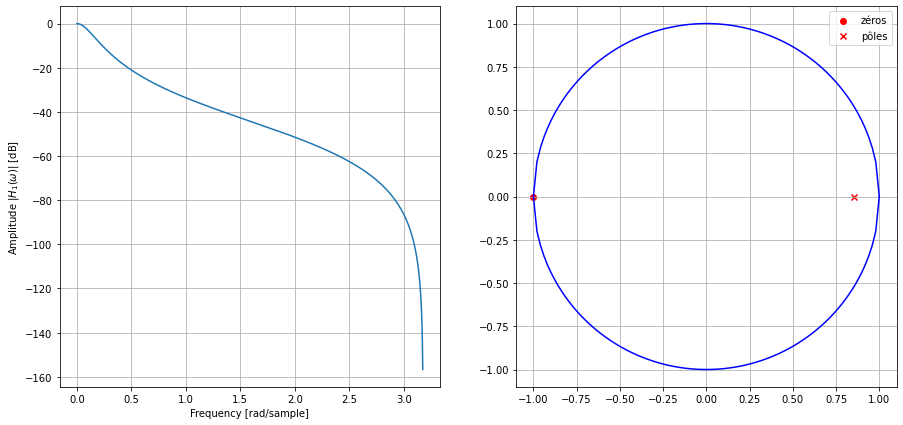

In [7]:
T = 0.1574034136
Omega_p = 1

b= [Omega_p, Omega_p]
a= [(2/T) + Omega_p, Omega_p - (2/T)]

N_points= 1024
[w,h] = signal.freqz(b, a, N_points, fs= 1/T)
[z, p, k] = signal.tf2zpk(b, a)
# h = np.fft.fftshift(h)
# w = np.fft.fftshift(np.fft.fftfreq(len(h), T))

fig, axs = plt.subplots(1,2,figsize=(15,7))
axs[0].plot(w,dB(h.real))
axs[0].set_xscale('linear')
axs[0].set_xlabel('Frequency [rad/sample]')
axs[0].set_ylabel('Amplitude $|H_1(\omega)|$ [dB] ')
axs[0].set_title('')
axs[0].grid()#True, which="both", axis='y')


print("(pôles, zéros):",p, z)
axs[1].scatter(z.real, z.imag, color='r', marker='o', label='zéros')
axs[1].scatter(p.real, p.imag, color='r', marker='x', label='pôles')
axs[1].legend()
axs[1].grid()
graphCircle(axs[1]) #cerlce d'unité

plt.show()

**Analyse :**

Le diagrame de pôles et zéros et le graphe $|H_1(\omega)|$ du filtre montrent que cela est un filtre passe-bas. L'influence des basses fréquences est accentuées par le pôle à $z=0.85 +0.0j$, et l'influence des hautes fréquences est diminue par le zéro à $z=-1.0 +0.0j $. Le diagramme de pôles-zéros montre en effect que cela est un filtre passe-bas.

## Exercice 2.2 : Filtres passe-bande


**1.**  En utilisant la relation de transformation bilinéaire, écrivez la forme générale du filtre passe-bande $ H_2(z) $  à partir du filtre passe-bas analogique de l'exercice 2.1 en utilisant la transformation:
$$
\begin{equation}
        s\rightarrow \Omega_p \frac{s^2 + \Omega_l \Omega_u}{s(\Omega_u - \Omega_l)}
 \end{equation}
$$
Vous pouvez poser $ \lambda_1 = \Omega_u - \Omega_l$ et $ \lambda_2 = \Omega_u\Omega_l$.

**Réponse** :

$$
H_b(s) = \frac{\Omega_p}{s + \Omega_p} 
       = \frac{\Omega_p}{\Omega_p\left[\frac{s^2 + \lambda_2}{s\lambda_1}\right] + \Omega_p} 
       = \frac{s\lambda_1}{s^2 + s\lambda_1 + \lambda_2}
$$

En utilizant la transformation bilinéaire du domaine des $s$ au domaine des $z$ on peut écrire une expression pour $H_1(z)$:


$\begin{align}
H_1(z) &= \frac{\frac{2\lambda_1}{T}\left(\frac{1-z^{-1}}{1+z^{-1}}\right)}{\frac{4}{T^2}\left(\frac{1-z^{-1}}{1+z^{-1}}\right)^2 + \frac{2\lambda_1}{T}\left(\frac{1-z^{-1}}{1+z^{-1}}\right) + \lambda_2} \\
       &= \frac{\frac{2\lambda_1}{T}\left(\frac{1-z^{-1}}{1+z^{-1}}\right)}{\frac{4}{T^2}\left(\frac{1-z^{-1}}{1+z^{-1}}\right)^2 + \frac{2\lambda_1}{T}\left(\frac{1-z^{-1}}{1+z^{-1}}\right) + \lambda_2} \\
       &= \frac{2\lambda_1 (1 -z^{-1})}{T(1 +z^{-1})}\left[\frac{4\left(1-z^{-1}\right)^2 +2\lambda_1T\left(1-z^{-1}\right)\left(1+z^{-1}\right) +\lambda_2T^2\left(1+z^{-1}\right)^2}{T^2\left(1+z^{-1}\right)^2}\right]^{-1} \\
H_1(z) &= \frac{2\lambda_1T(1-z^{-2})}{\left(4 +2\lambda_1T +\lambda_2T^2\right) + z^{-1}\left(2\lambda_2T^2 -8\right) + z^{-2}\left(\lambda_2T^2 -2\lambda_1T +4\right)}
\end{align}$

## Exercice 2.3 : Application de la conversion de filtre


Nous allons maintenant créer une série de filtres passe-bande et les appliquer a un signal. 

La fonction freq_arr() renvoie une liste, X, de fréquences (numériques) de coupure inférieure et supérieure choisies en fonction de la perception des différentes fréquences par l'oreille humaine (également appelée échelle de Mel). La relation est la suivante: $\omega_l $ = X[i] et $\omega_u $ = X[i +1] et $ i = 1, 2, .... N_{filt} $. Grâce à cela, vous pouvez concevoir des filtres passe-bande $ N_{filt} $ de différentes bandes passantes.


In [8]:
def freq_arr(fs):
    """ Ne pas modifier cette cellule -- do not change this cell
    Cette fonction génère les pulsations de coupure basses et haut pour l'ensemble des filtres
    Fréquence de sortie : en Hertz.(Numérique)"""
    nfilt = 10
    low_freq_mel = 0
    high_freq_mel = (2595 * np.log10(1 + (fs / 2) / 700))  # Convert Hz to Mel
    mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
    hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
    return hz_points

Complétez le squelette de code avec les étapes suivantes :
    
**1.** Chargez musique.wav. Vous pouvez utiliser wavfile.read.

**2.** Tracez l'amplitude de la réponse en fréquence du fichier musique.wav.

**3.** À partir de freq_arr( ), obtenez la liste des fréquences de coupure $\omega_l, \omega_u$ en utilisant la fréquence d'échantillonnage de musique.wav

**4.** Complétez la fonction convert_discrete_to_continuous() qui doit convertir les valeurs en fréquences analogiques $\Omega_l, \Omega_u$  (en rads/sample) en utilisant la relation des fréquences: 
$$
\begin{equation}
\Omega = \frac{2}{T}tan(\frac{\omega}{2}) 
\end{equation}
$$

**5.** Complétez la fonction construct_digital_bandpass_filter( ), qui utilise les valeurs de $\Omega_l, \Omega_u$ pour construire des filtres passe-bande numériques, en utilisant la relation obtenue à la Question 2.2.1.

**6.** Complétez le squelette de code qui itère à travers les fréquences générées par freq_arr (). Dans cette boucle :
 - Utilisez la fonction convert_discrete_to_continuous( ) pour générer des fréquences continues.
 - Construisez des filtres passe-bande en les utilisant avec la fonction construct_digital_bandpass_filter( ).
 - Tracez l'amplitude de la réponse en fréquence de chaque filtre (utiliser `signal.freqz`).
 - Appliquez ces filtres au signal musique.wav (en utilisant `scipy.lfilter`) et visualisez l'amplitude du sprectre du signal filtré. Enregistrez les signaux filtrés dans un fichier .wav à l'aide de la fonction :
`wavfile.write('name.wav', int(fs), np.asarray(output, dtype=np.int16))`.



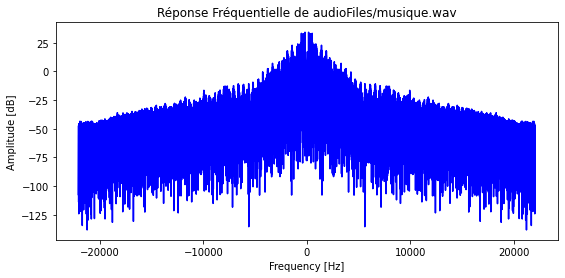

In [9]:
# Template code for Ex2.3.1,  Ex2.3.2 and Ex2.3.3

# (Ex2.3.1): Read the wav file using wavfile.read and put the output in wav_fs, wav_data respectively
wav_file = 'audioFiles/musique.wav'
wav_fs, wav_data =  wavfile.read(wav_file) 
fs = wav_fs
T = 1/fs

# (Ex2.3.2): Plot the magnitude of the frequency response of the audio file
wav_data = wav_data / np.linalg.norm(wav_data)
wav_fft = np.fft.fftshift(np.fft.fft(wav_data))
wav_w = np.fft.fftshift(np.fft.fftfreq(len(wav_data), 1/fs))

fig, ax = plt.subplots(1, 1,figsize=(9,4))
#fig.subplots_adjust(hspace = 0.5)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.set_title("Réponse Fréquentielle de {}".format(wav_file))
ax.plot(wav_w, dB(wav_fft.real), color='b')
plt.show()

# (Ex2.3.3): Generate the freq lower and upper bounds for the band pass using the sampling frequency.
filters_arr = freq_arr(fs)

In [10]:
# Template code for Ex2.3.4
# Convert from Discrete to Continuous Frequency using the bilinear transform relation
def convert_discrete_to_continuous(f_discrete_l, f_discrete_u, T):
    # Convert to rad/sample from Hz
    omega_discrete_l = (2.0*np.pi) * f_discrete_l * T
    omega_discrete_u = (2.0*np.pi) * f_discrete_u * T

    # Convert from Discrete to Continuous Frequency using bilinear transform relation
    omega_cont_l = (2.0/T) * np.tan(omega_discrete_l / 2.0)
    omega_cont_u = (2.0/T) * np.tan(omega_discrete_u / 2.0)
    
    return omega_cont_l, omega_cont_u

In [11]:
# Template code for Ex2.3.5
# Construct the digital band-pass filter defined in Ex2.2.1 
def construct_digital_bandpass_filter(omega_cont_l, omega_cont_u, T):
    # Define difference and product of pass band frequencies
    lambda_1 = omega_cont_u - omega_cont_l
    lambda_2 = omega_cont_u * omega_cont_l

    # Define the coefficients of the digital filter
    b_coeffs = [(2*lambda_1*T), 
                0, 
                (-2*lambda_1*T)]
    
    a_coeffs = [(4 +(2*lambda_1*T) + (lambda_2*(T**2))), 
                ((2*lambda_2*(T**2)) - 8), 
                ((lambda_2*(T**2)) -(2*lambda_1*T) +4)]
    
    return a_coeffs, b_coeffs

/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:137: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


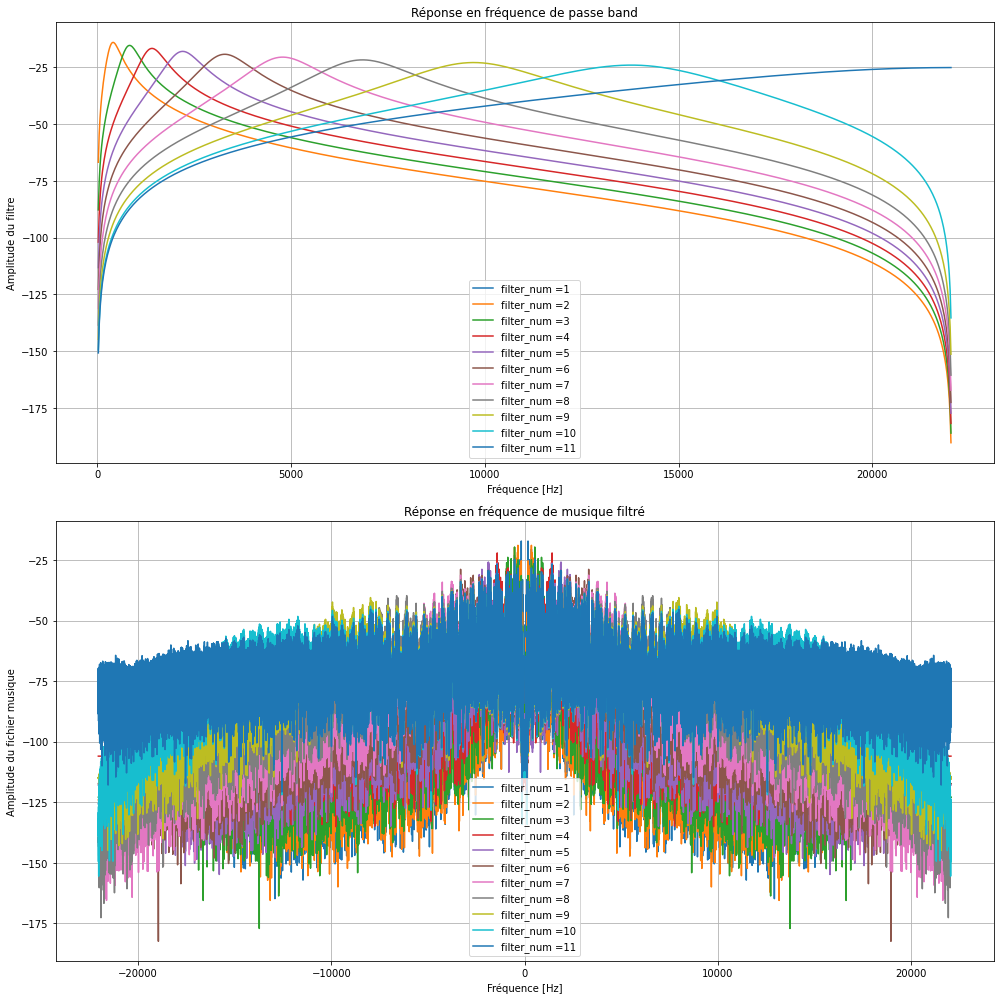

In [12]:
# Code Ex.2.3.6

# Plots magnitude given filter TF
def plotMag(a, b, T, ax):
    N_points= 1024 #number of frequencies to compute over
    [w,h] = signal.freqz(b, a, N_points, fs= 1/T)
#    h = np.fft.fftshift(h)
    h= h /np.linalg.norm(h)
#    w = np.fft.fftshift(np.fft.fftfreq(len(h), T))
    #w = w /np.linalg.norm(w)

    ax.plot(w,dB(h.real))
    ax.set_xscale('linear')
    ax.grid(True, which="both", axis='y')
    

fig, ax = plt.subplots(2, 1, figsize=(14, 14))
ax[0].set_title('Réponse en fréquence de passe band')
ax[1].set_title('Réponse en fréquence de musique filtré')
legends = []

for i in range(0, len(filters_arr)-1):
    # Load the Digital frequency(Hz) as provided by the freq_arr() function
    f_discrete_l = filters_arr[i]
    f_discrete_u = filters_arr[i+1]
    
    # Ex2.3.6, 1st bullet: Convert from Discrete to Continuous Frequency using the bilinear transform relation
    omega_cont_l, omega_cont_u = convert_discrete_to_continuous(f_discrete_l, f_discrete_u, T)
    
    # Ex2.3.6 2nd bullet: Construct the digital band-pass filter defined in Ex2.2.1 
    a_coeffs, b_coeffs = construct_digital_bandpass_filter(omega_cont_l, omega_cont_u, T)
    
    # Ex2.3.6 3rd bulltet : Plot the magnitude of the frequency response of the digital band-pass filter
    plotMag(a_coeffs, b_coeffs, T, ax[0])

    
    # Ex2.3.6 4th bulltet : Filter the .wav using lfilter
    y_band_wav = signal.lfilter(b_coeffs, a_coeffs, wav_data)
    
    data = y_band_wav / np.linalg.norm(y_band_wav) #normalize to hear audio properly
    wavfile.write('audioFiles/band_pass_'+str(i)+'.wav', wav_fs, data.astype(np.float32))
    
    # Ex2.3.6: Plot the magnitude of the frequency response of the filtered .wav
    fft_band_wav = np.fft.fftshift(np.fft.fft(y_band_wav))
    fft_band_wav = fft_band_wav / np.linalg.norm(fft_band_wav)
    w = np.fft.fftshift(np.fft.fftfreq(len(fft_band_wav), T))
    
    ax[1].plot(w, dB(fft_band_wav))
    legends.append('filter_num =%d' % (i+1))

ax[0].grid('on')
ax[0].set_ylabel('Amplitude du filtre')
ax[0].set_xlabel('Fréquence [Hz]')
ax[0].legend(legends)

ax[1].grid('on')
ax[1].set_ylabel('Amplitude du fichier musique')
ax[1].set_xlabel('Fréquence [Hz]')
ax[1].legend(legends)

plt.tight_layout()
plt.show()

**7.**  Regardez l'amplitude de chaque son filtré, écoutez ces sons et comparez-les aux signaux d'origine. Que peut-on dire sur notre perception des sons dans chaque bande de fréquence?

**Réponse :**

Le son "musique.wav" contient plus de fréquences basses que de fréquences hautes. Lorsque $filter\_num$ augmente, la qualité du son décroît, car les basses fréquences sont plus attenuées que les hautes fréquences. Cela est consistent avec le graphe de la réponse impulsionelle de chaque filtre passe-bande. Lorsque $filter\_num$ augmente, la bande passante couvre une intervale de $\omega_l=X[i]$ à $\Omega_u=X[i+1]$ à travers de plus en plus hautes fréquences. Pour un filtre dont $filter\_num = 11$, même si les basses fréquences sont moins audibles, les hautes fréquences (dans la bande passante du filtre) du son ne sont pas attenuées, et sont encore audibles. 